In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\Data-processed\crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,70,41,37,20.879744,82.002744,6.502985,202.935536,rice
1,70,48,44,21.770462,80.319644,7.038096,226.655537,rice
2,89,52,40,23.004459,82.320763,7.840207,263.964248,rice
3,74,53,45,26.491096,80.158363,6.980401,242.864034,rice
4,90,53,43,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,106,28,31,26.774637,66.413269,6.780064,177.774507,coffee
2196,106,39,29,27.417112,56.636362,6.086922,127.924610,coffee
2197,107,28,32,24.131797,67.225123,6.362608,173.322839,coffee
2198,82,15,31,26.272418,52.127394,6.758793,127.175293,coffee
2199,85,23,33,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

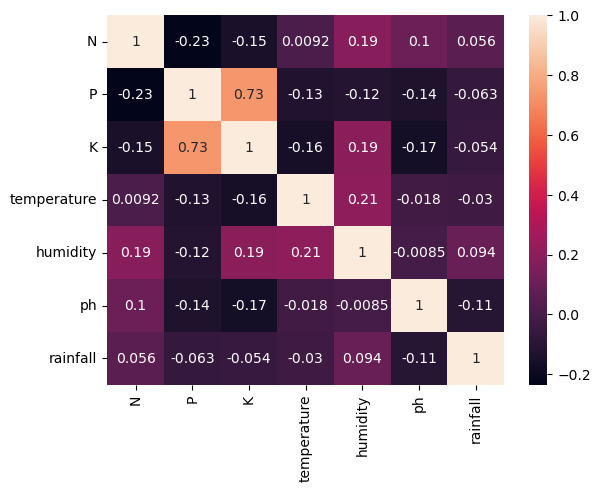

In [13]:
sns.heatmap(df.corr(),annot=True)

<h3>Seperating features and target label</h3>

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [15]:
#accuracy and model name
acc = []
model = []

In [16]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

<h2>Decision tree</h2>

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  84.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.94      1.00      0.97        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.87      0.95      0.91        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [18]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.91590909, 0.89772727, 0.93409091, 0.91136364, 0.94545455])

<b>Saving the trained Decision tree model</b>

In [20]:
DT_pkl = open(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\models\DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_pkl)
DT_pkl.close()

<h2>Guassian Naive Bayes</h2>

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [22]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99318182, 0.99772727, 0.99545455, 0.99318182, 0.98863636])

<b>Saving the trained Naive Bayes model</b>

In [23]:
NB_pkl = open(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\models\NaiveBayes.pkl', 'wb')
pickle.dump(NaiveBayes, NB_pkl)
NB_pkl.close()

<h2>Support Vector Machine (SVM)</h2>

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
 

In [25]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.975     , 0.975     , 0.97272727, 0.98409091, 0.97272727])

<b>Saving the trained SVM model</b>

In [26]:
SVM_pkl = open(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\models\SVMClassifier.pkl', 'wb')
pickle.dump(SVM, SVM_pkl)
SVM_pkl.close()

<h2>Random Forest</h2>

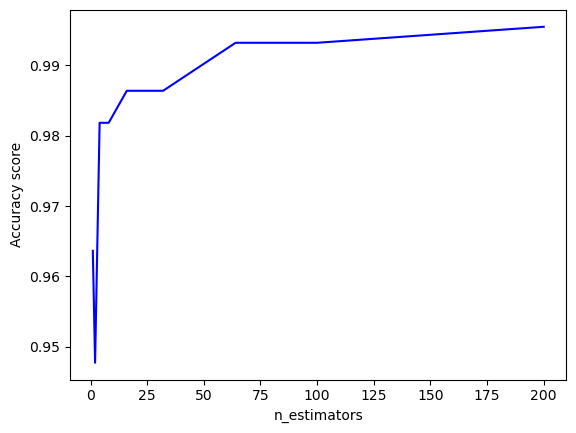

In [27]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()                      

In [28]:
acc_score

[0.9636363636363636,
 0.9477272727272728,
 0.9818181818181818,
 0.9818181818181818,
 0.9863636363636363,
 0.9863636363636363,
 0.9931818181818182,
 0.9931818181818182,
 0.9954545454545455]

In [29]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.92      0.86      0.89        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [30]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99545455, 0.99545455, 0.99318182, 0.98636364])

<b>Saving the trained Random Forest model</b>

In [31]:
RF_pkl = open(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\models\RandomForest.pkl', 'wb')
pickle.dump(RF, RF_pkl)
RF_pkl.close()

<h2>K-Nearest Neighbour</h2>

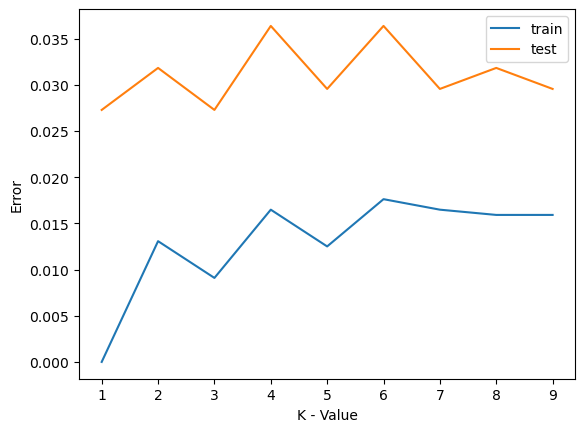

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
error1=[]
error2=[]
for k in range(1,10):
  k_nn = KNeighborsClassifier(n_neighbors=k)
  k_nn.fit(Xtrain,Ytrain)
  y_pred1 = k_nn.predict(Xtrain)
  error1.append(np.mean(Ytrain!=y_pred1))
  y_pred2 = k_nn.predict(Xtest)
  error2.append(np.mean(Ytest!=y_pred2))
plt.plot(range(1,10),error1,label='train')
plt.plot(range(1,10),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [33]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_norm,Ytrain)
predicted_values = knn.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('KNN')                   #model name
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.84      1.00      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.87      0.91        23
       maize       1.00      0.95      0.98        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [34]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99545455, 0.99545455, 0.99318182, 0.98636364])

<b>Saving the trained Random Forest model</b>

In [35]:
KNN_pkl = open(r'C:\Users\91944\OneDrive\Desktop\Final\Crop_Recommendation_System\models\KNN.pkl', 'wb')
pickle.dump(knn, KNN_pkl)
KNN_pkl.close()

<h2>Comparing models</h2>

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

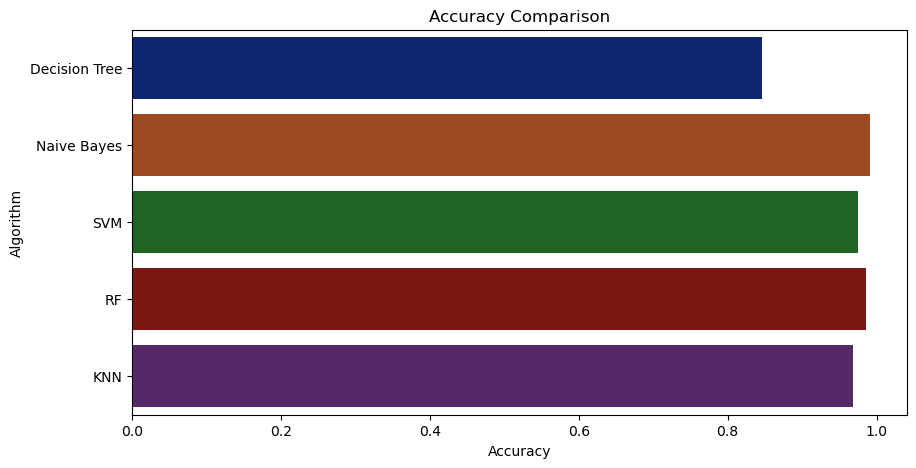

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [37]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8454545454545455
Naive Bayes --> 0.990909090909091
SVM --> 0.975
RF --> 0.9863636363636363
KNN --> 0.9681818181818181


In [39]:
import pandas as pd

# Assuming 'timestamp' is the column name for the timestamp and 'temperature' is the temperature data
# Replace 'your_dataset.csv' with the actual file name or provide your DataFrame directly

# Read the dataset
df = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\bengaluru.csv')

df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [40]:
df_subset = df[['date_time','tempC']]
df_subset.head()

,date_time,tempC
0,2009-01-01 00:00:00,14
1,2009-01-01 01:00:00,14
2,2009-01-01 02:00:00,13
3,2009-01-01 03:00:00,12
4,2009-01-01 04:00:00,14


In [41]:
df_subset['date_time'] = pd.to_datetime(df_subset['date_time'])

# Set the 'timestamp' column as the index
df_subset.set_index('date_time', inplace=True)

# Resample the data to daily frequency and use mean() as the aggregation function
daily_temperature = df_subset['tempC'].resample('D').mean()
daily_temperature = daily_temperature.round(4)
# Create a new DataFrame with the daily temperature data
daily_temperature_df = pd.DataFrame({'Date': daily_temperature.index, 'Daily_Temperature': daily_temperature.values})

# Print or save the resulting DataFrame
print(daily_temperature_df)

# If you want to save the daily temperature data to a new CSV file
daily_temperature_df.to_csv('daily_bengaluru_temperature_data.csv', index=False)

           Date  Daily_Temperature
0    2009-01-01            19.0417
1    2009-01-02            20.6250
2    2009-01-03            20.1667
3    2009-01-04            20.7917
4    2009-01-05            20.6667
...         ...                ...
4013 2019-12-28            21.3750
4014 2019-12-29            20.9167
4015 2019-12-30            20.7917
4016 2019-12-31            21.2083
4017 2020-01-01            21.7083

[4018 rows x 2 columns]


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('daily_bengaluru_temperature_data.csv')
df['timestamp'] = pd.to_datetime(df['Date'])
df.set_index('timestamp', inplace=True)

In [43]:
df = df.drop('Date',axis=1)
df.head()

,Daily_Temperature
timestamp,
2009-01-01,19.0417
2009-01-02,20.6250
2009-01-03,20.1667
2009-01-04,20.7917
2009-01-05,20.6667


C:\Users\91944\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91944\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


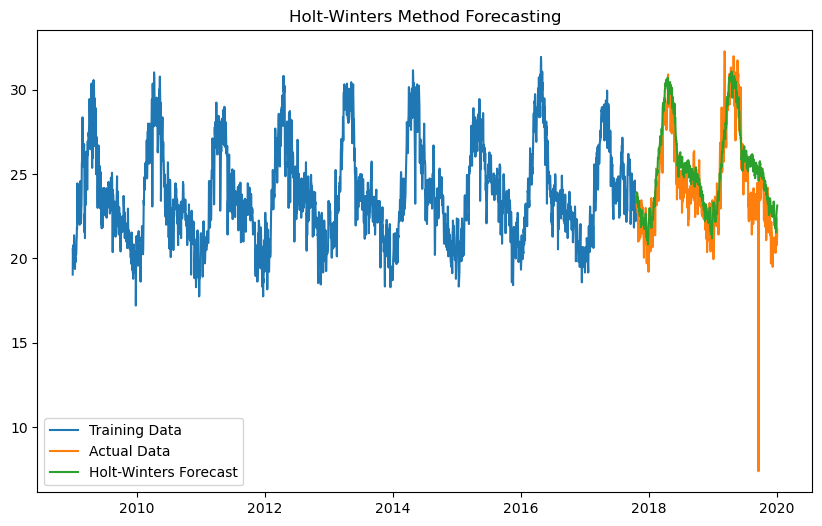

In [44]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Apply Holt-Winters method
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365)
fitted_model = model.fit()

# Forecast the future values
forecast = fitted_model.forecast(len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Data')
plt.plot(test.index, forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title('Holt-Winters Method Forecasting')
plt.show()


In [45]:
weekly_data = df.resample('W').mean().round(4)
# Reset the index to make 'timestamp' a regular column again
weekly_data.reset_index(inplace=True)
print(weekly_data)

weekly_data.to_csv('weekly_bengaluru_temperature_data.csv', index=False)

weekly_data['Date'] = pd.to_datetime(weekly_data['timestamp'])
# Set the 'timestamp' column as the index
weekly_data.set_index('Date', inplace=True)
weekly_data = weekly_data.drop('timestamp',axis=1)
weekly_data.head()

     timestamp  Daily_Temperature
0   2009-01-04            20.1563
1   2009-01-11            20.4524
2   2009-01-18            19.7738
3   2009-01-25            20.8214
4   2009-02-01            22.8750
..         ...                ...
570 2019-12-08            20.3512
571 2019-12-15            20.7381
572 2019-12-22            20.6845
573 2019-12-29            21.4941
574 2020-01-05            21.2361

[575 rows x 2 columns]


,Daily_Temperature
Date,
2009-01-04,20.1563
2009-01-11,20.4524
2009-01-18,19.7738
2009-01-25,20.8214
2009-02-01,22.8750


C:\Users\91944\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


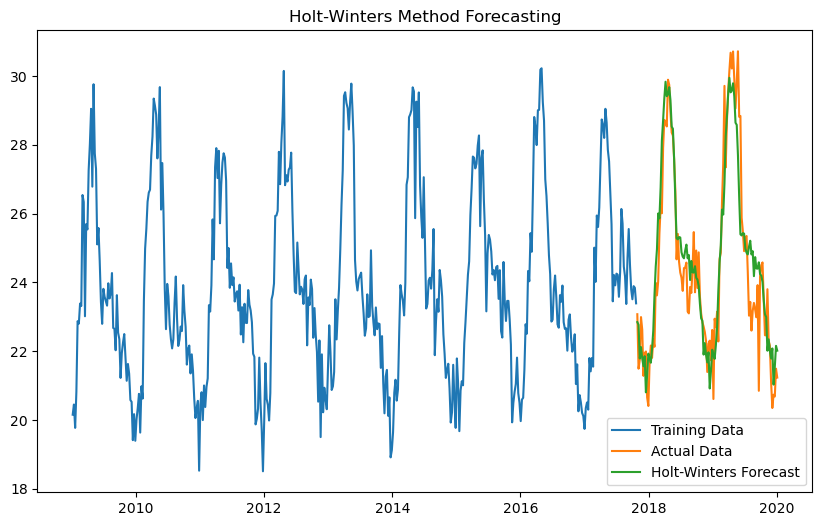

In [46]:
# Split data into training and testing sets
train_size = int(len(weekly_data) * 0.8)
train, test = weekly_data.iloc[:train_size], weekly_data.iloc[train_size:]

# Apply Holt-Winters method
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52)  #a year has 52 weeks assumed
fitted_model = model.fit()

# Forecast the future values
forecast = fitted_model.forecast(len(test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')
plt.plot(test.index, test.values, label='Actual Data')
plt.plot(test.index, forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title('Holt-Winters Method Forecasting')
plt.show()


In [49]:
# Forecast future values for one week ahead
forecast1 = fitted_model.forecast(steps=1)

# Access the forecasted temperature value for next week
temperature_next_week = forecast1[0]

In [50]:
temperature_next_week

22.848047956308527

In [53]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data = np.array([[77,49,42,temperature_next_week,82,6.5,202]])
prediction = RF.predict(data)
print(prediction)

['rice']
